<span style="color:gray">Интеллектуальный анализ данных в R и Python. Лекция 4</span>

### 5.  Обучение с учителем. Полиномиальные регрессионные модели.

<font color='blue'>Линейный член</font> для линейной регрессии указывает на линейность параметров. Однако возможно построить линейную регрессию с <font color='blue'>нелинейной</font> функцией. В общем, мы можем искать линейную комбинацию некоторых базисных (потенциально нелинейных) функций $f_i(x_i)$:

$$
\hat{y}(w,x) = \sum_{i=1}^p w_i f_i(x_i) + w_0.
$$

Простым примером является использование полиномиальных признаков, например, второй степени. Если набор данных представлен двумя признаками $\{x_1, x_2\}$, то получим:

$$
\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2
$$

вместо

$$
\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2.
$$

Такая проблема, тем не менее, является линейной, потому что параметры регрессии $\{w_0, w_1, w_2, w_4, w_5\}$ по-прежнему линейны, в то время как исходные данные расширяются полиномиальным представлением $\{x_1, x_2, x_1 x_2, x_1^2, x_2^2\}$. Для автоматической генерации полиномиальных членов регрессии мы будем использовать функцию [`sklearn.preprocessing.PolynomialFeatures`] (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Подробнее см. Главу [1.1.16. Polynomial regression: extending linear models with basis functions] (http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) официальной scikit-learn документации.


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_blobs

In [14]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X).astype(int)

array([[ 1,  0,  1,  0,  0,  1],
       [ 1,  2,  3,  4,  6,  9],
       [ 1,  4,  5, 16, 20, 25]])

In [16]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X).astype(int)

array([[ 1,  0,  1,  0],
       [ 1,  2,  3,  6],
       [ 1,  4,  5, 20]])

#### Использование полинома третьей степени для более точного решения.

In [17]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

X = np.arange(5)[:, np.newaxis]
y = 3 - 2 * X + X ** 2 - X ** 3

model = model.fit(X, y)
model.named_steps['linear'].coef_

array([[ 3., -2.,  1., -1.]])

#### Включение членов взаимодействия с помощью функции XOR.

In [18]:
model = Pipeline([('interact', PolynomialFeatures(interaction_only=True)),
                  ('linear', LinearRegression(fit_intercept=False))])

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]

model = model.fit(X, y)
model.predict(X).astype(int)

array([0, 1, 1, 0])

In [19]:
model.score(X, y)

1.0

#### Использование полиномиальных атрибутов в линейной регрессии.

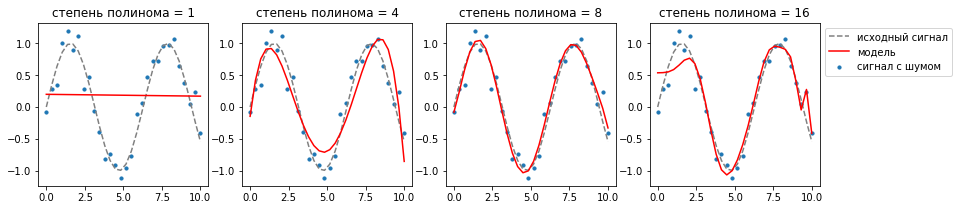

In [20]:
X = np.linspace(0.0,10.0,30)[:, np.newaxis]
y = np.sin(X) + np.random.normal(0.0,0.2,X.shape)

fig, ax = plt.subplots(1, 4, figsize=(14, 3))

#for i,degree in enumerate([1,2,3,4]):
for i,degree in enumerate([1,4,8,16]):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression())])

    model = model.fit(X, y)

    ax[i].scatter(X[:, 0], y[:, 0], s=10, cmap=plt.cm.Set1, label='сигнал с шумом')
    ax[i].plot(X[:, 0], np.sin(X), c='gray', linestyle='--', label='исходный сигнал');
    ax[i].plot(X,model.predict(X),'-r',label='модель')
    ax[i].set(title='степень полинома = ' + str(degree))
    if (i==3): ax[i].legend(loc='upper left', bbox_to_anchor=(1,1))

plt.show();

#### Использование полиномиальных атрибутов в логистической регрессии для задач классификации.

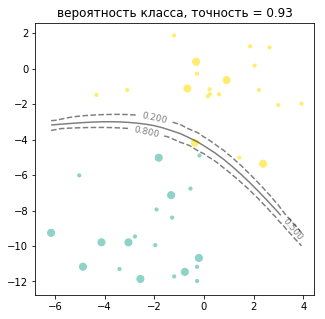

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

def calculate_decision_function(X,model):
    '''
    Create a 2D grid to evaluate model.
    '''

    xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
    yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model(xy).reshape(XX.shape)

    return (XX,YY,Z)

# генерируем набор из 40 наблюдений
X, y = make_blobs(n_samples=40, centers=2, cluster_std=2.0, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('logistic', LogisticRegression())])

model.fit(X_train, y_train)
accuracy_test = model.score(X_test,y_test) 

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10, cmap=plt.cm.Set3)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=plt.cm.Set3)

# Строим разделяющую гиперплоскость с вероятностями принадлежности к классу
(XX,YY,Z) = calculate_decision_function(X, lambda x: model.predict_proba(x)[:,0])
CS = ax.contour(XX, YY, Z, colors='k', levels=[0.2, 0.5, 0.8], alpha=0.5, linestyles=['--', '-', '--'])
ax.clabel(CS, fontsize=9, inline=1)
ax.set(title='вероятность класса, точность = ' + '{0:.2f}'.format(accuracy_test))

plt.show();

In [22]:
pd.crosstab(pd.Series(y_test,name='Истинный класс'), 
            pd.Series(model.predict(X_test),name='Предсказание класса'),
            margins=True)

Предсказание класса,0,1,All
Истинный класс,,,
0,9,0,9
1,1,4,5
All,10,4,14


In [23]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.80      0.89         5

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



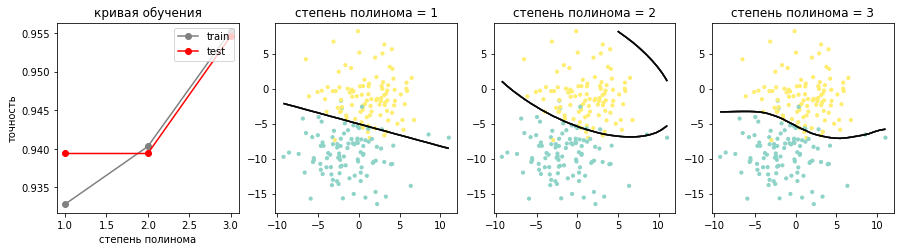

In [24]:
# we create 40 separable points
X, y = make_blobs(n_samples=200, centers=2, cluster_std=3.0, random_state=2)

fig, ax = plt.subplots(1, 4, figsize=(15, 3.5))

degrees = range(1,4)
accuracy_train = []
accuracy_test = []
    
for degree in degrees:
    
    if degree in [1,2,3]:
        ax[degree].scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.Set3)
        ax[degree].set(title='степень полинома = ' + str(degree))

    temp_train = 0.0
    temp_test = 0.0

    for temp in range(30):
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)#, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                          ('logistic', LogisticRegression(max_iter = 900))])

        model.fit(X_train, y_train)

        temp_train += model.score(X_train,y_train)
        temp_test += model.score(X_test,y_test)
        
        if degree in [1,2,3]:
            (XX,YY,Z) = calculate_decision_function(X, lambda x: model.predict_proba(x)[:,0])
            CS = ax[degree].contour(XX, YY, Z, colors='k', levels=[0.5], alpha=0.1, linestyles=['-'])

    accuracy_train.append(temp_train/30.0)
    accuracy_test.append(temp_test/30.0)

ax[0].plot(degrees, accuracy_train, '-o', color='gray', label='train') 
ax[0].plot(degrees, accuracy_test, '-o', color='red', label='test') 
ax[0].legend(loc='upper right')
ax[0].set(title='кривая обучения',xlabel='степень полинома',ylabel='точность')

plt.show();

<font color='green'>Задание для самостоятельной работы:</font>

1. Построить модель полиномиальной регрессии на реальном наборе данных, запуская ячейки в данном Jupyter Notebook и меняя значения параметров полинома. 
1. Создать ячейку и написать пояснение, как порядок полинома влияет на качество модели линейной и логистической регрессии. 
1. Загрузить результирующий .ipynb файл в папку /assignments/. Файлы должны именоваться как:<br>
   *'Lecture_4_' + surname*.

#### Влияние порядков полинома  

В общем случае повышение порядка увеличивает качество (точность) модели. Однако в опредленный момент увеличение полинома уже не даёт ощутимого прибавления точности.